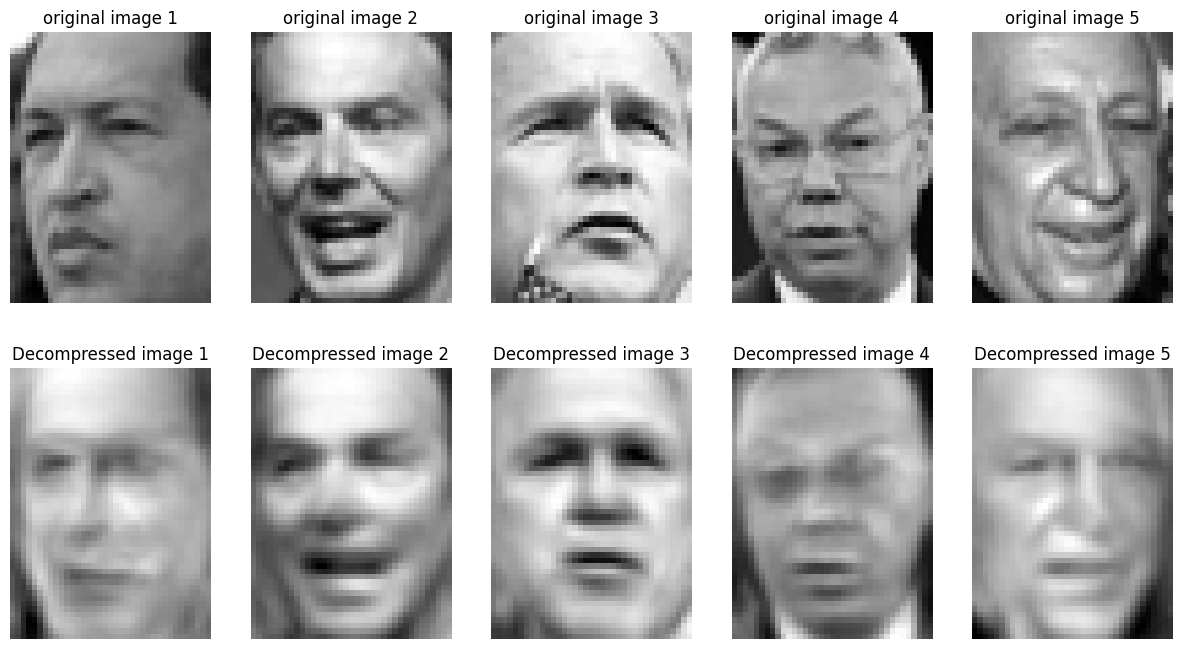

In [ ]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Load LFW(Labeled Faces in the Wild) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#(n_samples: 1288 , n_features: 1850 , n_classes: 7)
# Get image dimensions to show in the plot
n_samples, h, w = lfw_people.images.shape

# Extract the data from the dataset X ->((1288, 1850))
X = lfw_people.data

# Subtract mean
mean = np.mean(X, axis=0)
X_centered = X - mean

# Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Compute eigenvectors and eigenvalues
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

# Sort indices of eigenvalues in descending order
eigen_values_indices = np.argsort(eigen_values)[::-1]

# Sort eigenvectors in descending order of eigenvalues
eigen_vectors = eigen_vectors[:, eigen_values_indices]

# Select top eigenvectors (principal components)
principal_components = 50
extracted_pc = eigen_vectors[:, :principal_components]

# Project data onto principal components
projected_data = np.dot(X_centered, extracted_pc)

# Reconstruct the original data
reconstructed_data = np.dot(projected_data, extracted_pc.T) + mean

# Display the first 5 faces, along with the original and decompressed faces
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i in range(5):
    # Original face
    axes[0, i].imshow(X[i].reshape((h, w)), cmap='gray')
    axes[0, i].set_title(f'original image {i+1}')
    axes[0, i].axis('off')

    # Decompressed face
    axes[1, i].imshow(reconstructed_data[i].reshape((h, w)), cmap='gray')
    axes[1, i].set_title(f'Decompressed image {i+1}')
    axes[1, i].axis('off')


plt.show()
